In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
training_data = pd.read_csv('training_data.csv', header=None)
training_labels = pd.read_csv('training_labels.csv', header=None)
training_subjects = pd.read_csv('training_subjects.csv', header=None)

In [81]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

X = training_data
y = training_labels
target_names = ['walking', 'walking-up', 'walking-down', 'sitting', 'standing', 'laying']

pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)

p = figure(plot_width=600, plot_height=600)
for label, name, color in zip(range(1,7), target_names, Spectral6):
    msk = np.asarray(split_training_labels[0]==label)
    p.scatter(X_r.T[0][msk], X_r.T[1][msk], color=color, alpha=0.8, size=12,
              marker="circle", line_color="black", legend=name)

p.legend.click_policy="hide"
p.xaxis.axis_label = "PCA 1"
p.yaxis.axis_label = "PCA 2"
p.legend.location = "top_center"

output_notebook()
show(p)


Loading BokehJS ...

In [82]:
split = training_subjects[0]<25

In [83]:
split_training_data = training_data[split]
split_training_labels = training_labels[split]
split_test_data = training_data[~split]
split_test_labels = training_labels[~split]

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_pred = gnb.fit(split_training_data, split_training_labels).predict(split_test_data)
sum(split_test_labels[0].values == gnb_pred)/float(len(gnb_pred))

0.8060046189376443

In [85]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(split_training_data, split_training_labels) 
KNN_pred = neigh.predict(split_test_data)
sum(split_test_labels[0].values == KNN_pred)/float(len(KNN_pred))

/Users/bsir/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


0.90069284064665123

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(split_training_data, split_training_labels) 
LDA_pred = clf.predict(split_test_data)
sum(split_test_labels[0].values == LDA_pred)/float(len(LDA_pred))

0.95034642032332561

In [87]:
from sklearn import svm
clf = svm.SVC()
clf.fit(split_training_data, split_training_labels)
SVM_pred = clf.predict(split_test_data)
#scores = cross_val_score(clf, training_data, training_labels[0], cv=5)
sum(split_test_labels[0].values == SVM_pred)/float(len(SVM_pred))

0.91339491916859128

In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(split_training_data, split_training_labels)
tree_pred = clf.predict(split_test_data)
sum(split_test_labels[0].values == tree_pred)/float(len(tree_pred))

0.86547344110854507

In [89]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(split_training_data, split_training_labels)
logreg_pred = logreg.predict(split_test_data)
sum(split_test_labels[0].values == logreg_pred)/float(len(logreg_pred))

0.94976905311778292

In [96]:
from sklearn.model_selection import cross_val_score
neighbors = [1,3,5,10,15,20,25,40, 50]
all_scores=[]
means = []
for n in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(neigh, split_training_data, split_training_labels[0], cv=5)
    all_scores.append(scores)
    means.append(np.mean(scores))

In [97]:
means

[0.89429438506674264,
 0.89722904927462444,
 0.90959086147332313,
 0.90919159964752827,
 0.91134885061762605,
 0.91095879873753149,
 0.91037440286290994,
 0.90487919550722185,
 0.90154700127519616]

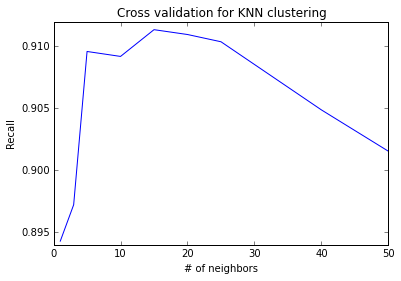

In [98]:
plt.plot(neighbors, means)
plt.title('Cross validation for KNN clustering')
plt.xlabel('# of neighbors')
plt.ylabel('Recall')

In [99]:
X_probe = np.column_stack((gnb_pred, KNN_pred, LDA_pred, SVM_pred, tree_pred, logreg_pred))
y_probe = split_test_labels

In [100]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=False)
model.fit(X_probe, y_probe)
model.coef_

array([[ 0.06326503,  0.11369953,  0.4479032 , -0.00605593,  0.07085031,
         0.31370109]])

In [101]:
preds=np.round(model.predict(X_probe))

In [102]:
sum(split_test_labels[0].values == np.concatenate(preds))/float(len(np.concatenate(preds)))

0.95438799076212466

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

params = {"n_estimators": 100000, 
          "learning_rate":0.01, 
          "max_depth":10, 
          "min_samples_leaf":50, 
          "min_samples_split":25, 
          "verbose":1}
model = GradientBoostingRegressor(**params)

model.fit(X_probe, y_probe)
preds=np.round(model.predict(X_probe))
#preds= model.predict(X_full)

      Iter       Train Loss   Remaining Time 
         1           2.9535            6.07m
         2           2.8954            3.57m
         3           2.8385            2.68m
         4           2.7827            2.23m
         5           2.7281            2.01m
         6           2.6745            1.90m
         7           2.6220            1.82m
         8           2.5705            1.79m
         9           2.5201            1.75m
        10           2.4706            1.72m
        20           2.0271            1.34m
        30           1.6643            1.39m
        40           1.3674            1.39m
        50           1.1245            1.33m
        60           0.9258            1.29m
        70           0.7633            1.30m
        80           0.6302            1.31m
        90           0.5214            1.26m
       100           0.4323            1.24m
       200           0.0846            1.18m
       300           0.0363            1.19m
       40

In [104]:
sum(split_test_labels[0].values == preds)/float(len(preds))

0.97055427251732107

In [105]:
#Predictions from LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

X = split_test_data
y = split_test_labels
target_names = ['walking', 'walking up stairs', 'walking down stairs', 'sitting', 'standing', 'laying']

lda = LinearDiscriminantAnalysis(n_components=10)
X_r2 = lda.fit(X, y).transform(X)

p = figure(plot_width=600, plot_height=600)
for label, name, color in zip(range(1,7), target_names, Spectral6):
    label_msk = np.asarray(split_test_labels[0]==label)
    correct_msk = np.asarray(LDA_pred == split_test_labels[0])[label_msk]
    p.scatter(X_r2.T[0][label_msk][correct_msk], X_r2.T[1][label_msk][correct_msk], color=color, alpha=0.8, size=12,
              marker="circle", line_color="black", legend=name)
    p.scatter(X_r2.T[0][label_msk][~correct_msk], X_r2.T[1][label_msk][~correct_msk], color=color, alpha=0.8, size=12,
              marker="circle_x", line_color="black", legend="misclassified " + name)

p.legend.click_policy="hide"
p.xaxis.axis_label = "LDA 1"
p.yaxis.axis_label = "LDA 2"
p.legend.location = "top_center"

output_notebook()
show(p)


Loading BokehJS ...

In [106]:
#Predictions from GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

X = split_test_data
y = split_test_labels
target_names = ['walking', 'walking up stairs', 'walking down stairs', 'sitting', 'standing', 'laying']

lda = LinearDiscriminantAnalysis(n_components=10)
X_r2 = lda.fit(X, y).transform(X)

p = figure(plot_width=600, plot_height=600)
for label, name, color in zip(range(1,7), target_names, Spectral6):
    label_msk = np.asarray(split_test_labels[0]==label)
    correct_msk = np.asarray(preds == split_test_labels[0])[label_msk]
    p.scatter(X_r2.T[0][label_msk][correct_msk], X_r2.T[1][label_msk][correct_msk], color=color, alpha=0.8, size=12,
              marker="circle", line_color="black", legend=name)
    p.scatter(X_r2.T[0][label_msk][~correct_msk], X_r2.T[1][label_msk][~correct_msk], color=color, alpha=0.8, size=12,
              marker="circle_x", line_color="black", legend="misclassified "+name)

p.legend.click_policy="hide"
p.xaxis.axis_label = "LDA 1"
p.yaxis.axis_label = "LDA 2"
p.legend.location = "top_center"

output_notebook()
show(p)


Loading BokehJS ...